In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import tensorflow
tensorflow.__version__

'2.6.0'

In [3]:
# 1. CIFAR 10 Data_Set Load & Review

from tensorflow.keras.datasets import cifar10

(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [4]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

50000
(50000, 32, 32, 3)
50000
[[6]
 [9]
 [9]
 [4]
 [1]]


In [5]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 32, 32, 3)
10000
[[3]
 [8]
 [8]
 [0]
 [6]]


In [6]:
# 2. Data Preprocesing

X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [7]:
print(X_train[0])

[[[0.23137255 0.24313725 0.24705882]
  [0.16862745 0.18039216 0.17647059]
  [0.19607843 0.18823529 0.16862745]
  ...
  [0.61960784 0.51764706 0.42352941]
  [0.59607843 0.49019608 0.4       ]
  [0.58039216 0.48627451 0.40392157]]

 [[0.0627451  0.07843137 0.07843137]
  [0.         0.         0.        ]
  [0.07058824 0.03137255 0.        ]
  ...
  [0.48235294 0.34509804 0.21568627]
  [0.46666667 0.3254902  0.19607843]
  [0.47843137 0.34117647 0.22352941]]

 [[0.09803922 0.09411765 0.08235294]
  [0.0627451  0.02745098 0.        ]
  [0.19215686 0.10588235 0.03137255]
  ...
  [0.4627451  0.32941176 0.19607843]
  [0.47058824 0.32941176 0.19607843]
  [0.42745098 0.28627451 0.16470588]]

 ...

 [[0.81568627 0.66666667 0.37647059]
  [0.78823529 0.6        0.13333333]
  [0.77647059 0.63137255 0.10196078]
  ...
  [0.62745098 0.52156863 0.2745098 ]
  [0.21960784 0.12156863 0.02745098]
  [0.20784314 0.13333333 0.07843137]]

 [[0.70588235 0.54509804 0.37647059]
  [0.67843137 0.48235294 0.16470588]


In [8]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [9]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [18]:
# 3. Keras Modeling

# CNN & DNN

from tensorflow.keras import models, layers

model = models.Sequential()
model.add(layers.Conv2D(filters=32, kernel_size=(3,3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))
model.add(layers.MaxPool2D(pool_size=(2,2)))
model.add(layers.Conv2D(filters=64, kernel_size=(3,3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dropout(0.4))
model.add(layers.Dense(units=64, activation='relu'))
model.add(layers.Dense(units=10, activation='softmax'))

In [19]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1024)             

In [20]:
# 모델 학습방법 설정

model.compile(loss = 'categorical_crossentropy',
              optimizer = 'adam',
              metrics = ['accuracy'])

In [21]:
%%time

Hist_model = model.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
313/313 [==============================] - 36s 13ms/step - loss: 1.7341 - accuracy: 0.3598 - val_loss: 1.4736 - val_accuracy: 0.4677
Epoch 2/100
313/313 [==============================] - 3s 11ms/step - loss: 1.3881 - accuracy: 0.4991 - val_loss: 1.3282 - val_accuracy: 0.5305
Epoch 3/100
313/313 [==============================] - 3s 11ms/step - loss: 1.2599 - accuracy: 0.5512 - val_loss: 1.1500 - val_accuracy: 0.5987
Epoch 4/100
313/313 [==============================] - 4s 12ms/step - loss: 1.1668 - accuracy: 0.5875 - val_loss: 1.1210 - val_accuracy: 0.6005
Epoch 5/100
313/313 [==============================] - 4s 12ms/step - loss: 1.1010 - accuracy: 0.6117 - val_loss: 1.0573 - val_accuracy: 0.6290
Epoch 6/100
313/313 [==============================] - 4s 13ms/step - loss: 1.0479 - accuracy: 0.6291 - val_loss: 1.0236 - val_accuracy: 0.6381
Epoch 7/100
313/313 [==============================] - 4s 12ms/step - loss: 1.0032 - accuracy: 0.6484 - val_loss: 0.9760 - val_accuracy

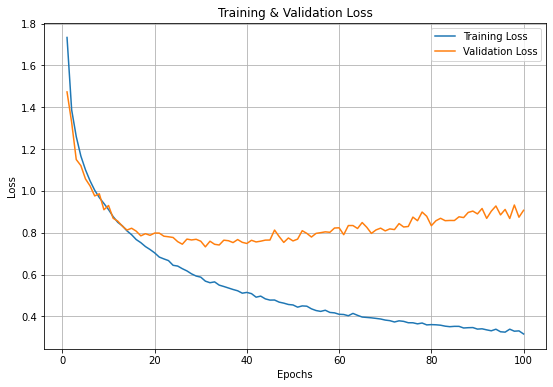

In [22]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_model.history['loss']) + 1)

plt.figure(figsize=(9,6))
plt.plot(epochs, Hist_model.history['loss'])
plt.plot(epochs, Hist_model.history['val_loss'])
# olt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

In [23]:
loss, accuracy = model.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 1s 4ms/step - loss: 0.9251 - accuracy: 0.7386
Loss = 0.92508
Accuracy = 0.73860
